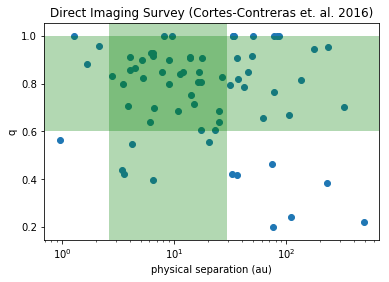

In [1]:
# Importing / setting up direct imaging (DI) data
import numpy as np
import matplotlib.pyplot as plt
dist_DI, angle_DI, m1_DI, m2_DI, spt_DI = np.genfromtxt('data\Cortes-Contreras_data.txt', skip_header = 1, delimiter = ',', unpack = True, dtype=(float), usecols = (3, 4, 5, 6, 7))

# calculating separation - by definition of parsec, separation = angular size * parsec
sep_DI = dist_DI * angle_DI

q_DI = np.zeros(70)
q_DI = np.divide(m2_DI, m1_DI)

plt.scatter(sep_DI, q_DI)
plt.ylabel("q")
plt.xlabel("physical separation (au)")
plt.xscale('log')
# plt.axhline(y=.3) # spt < 3.5
# plt.axhline(y=.6) # spt > 3.5
# plt.axvline(x=2.6)
# plt.axvline(x=29.5)
plt.axvspan(2.6, 29.5, facecolor='g', alpha=.3)
plt.axhspan(.6, 1, facecolor='g', alpha=0.3)
plt.title("Direct Imaging Survey (Cortes-Contreras et. al. 2016)")
plt.show()

43


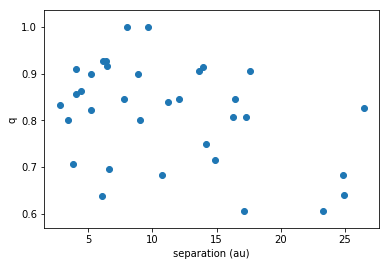

In [2]:
# finding index of values of sep beyond completeness limit
sorted_sep_DI = np.sort(sep_DI)
for pos, val in enumerate(sorted_sep_DI):
    if val > 2.6:
        complete_pos_sep = pos # = 4
#         print(complete_pos_sep)
        break 
for pos, val in enumerate(sorted_sep_DI):
    if val > 29.5:
        complete_pos_sep = pos # = 43
        print(complete_pos_sep)
        break  
        
# places associated q and s values together in one 2 row array
# DI_data[0] = sep, [1] = q
DI_data = np.stack((sep_DI, q_DI, spt_DI))

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a1 = DI_data[0,:].argsort() 
DI_data_sorted = DI_data[:,a1]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
DI_data_complete1 = np.array([DI_data_sorted[i][4:43] for i in range(0,3)])

# accounting for q completion
# sorts array of values by ascending q, keeps associated values together
a2 = DI_data_complete1[1,:].argsort() 
DI_data_sorted2 = DI_data_complete1[:,a2]

# finding index of values of q beyond completeness limit
sorted_q_DI = np.sort(DI_data_sorted2[1])
for pos, val in enumerate(sorted_q_DI):
    if val > .6:
        complete_pos_DI = pos # = 13
#         print(complete_pos_DI)
        break

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
CC_data_complete = np.array([DI_data_sorted2[i][5:] for i in range(0,3)])

# print(DI_data_complete)

plt.scatter(CC_data_complete[0],CC_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.show()

[0.028733814982608876 0.7976326909574777 0.04658442059739402
 0.22087331158006182 0.04475480868014641 0.036294678201237336]
4.639037510000115


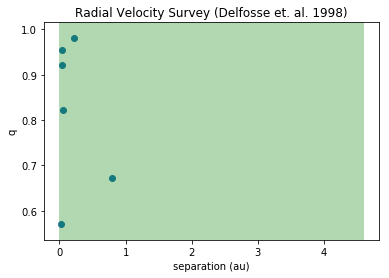

In [3]:
P_RV_days, e_RV, w_RV, k1_RV, k2_RV, v0_RV, m1_RV, m2_RV,sep_RV = np.loadtxt('data\Delfosse_data.txt', skiprows = 2, delimiter = ',', unpack = True)

G = 6.67 * 10**-11 # m**3 kg**-1 s**-2
pi = 3.14159265359

# unit conversion
P_RV_secs = P_RV_days * 86400 # days to seconds
m1_RV_kg = m1_RV * 2*10**30 # Msun to kg
m2_RV_kg = m2_RV * 2*10**30 # Msun to kg

# separation calculation - sep = ((P**2G(m1+m2))/2pi**2)**(1/3)
sep_RV_m = ((((P_RV_secs**2)*G*(m1_RV_kg+m2_RV_kg))/(4*pi**2))**(1/3))
sep_RV = sep_RV_m * 6.685*10**-12
print(sep_RV)

# separation detection limit calculation - sensitive to periods < 20 years and negligible companion mass, using mean mass of primaries and P = 20 years
mean_mass_msun = sum(m1_RV) / len(m1_RV)
mean_mass_kg = mean_mass_msun * 2*10**30
period_limit = 6.307 * 10**8 # 20 years in seconds
sep_complete_m = ((((period_limit**2)*G*mean_mass_kg)/(4*pi**2))**(1/3))
sep_complete_au = sep_complete_m * 6.68459*10**-12 # m to au
print(sep_complete_au) # = 4.6


q_RV = np.divide(m2_RV,m1_RV)

plt.scatter(sep_RV, q_RV)
plt.ylabel("q")
plt.xlabel("separation (au)")
# plt.axvline(x=4.6)
plt.axvspan(0, 4.6, facecolor='g', alpha=.3)
plt.title("Radial Velocity Survey (Delfosse et. al. 1998)")
plt.show()

RV_data = np.stack((sep_RV,q_RV))

1


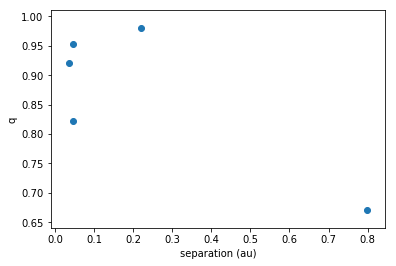

In [4]:
sorted_q_RV = np.sort(q_RV)
for pos, val in enumerate(sorted_q_RV):
    if val > .6:
        complete_pos_q = pos # = 1
        print(complete_pos_q)
        break 

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a2 = RV_data[1,:].argsort() 
RV_data_sorted = RV_data[:,a2]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
Del_data_complete = np.array([RV_data_sorted[i][1:] for i in range(0,2)])

plt.scatter(Del_data_complete[0], Del_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")

plt.show()

In [5]:
from scipy import stats as sci
print(sci.ks_2samp(CC_data_complete[1],Del_data_complete[1]))
# p is large - accept the null hypothesis that two samples are drawn from same distribution

Ks_2sampResult(statistic=0.48235294117647054, pvalue=0.18536640504452792)


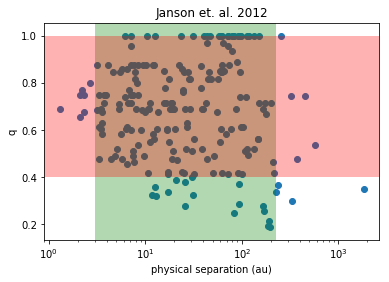

1836.0
573.2


In [6]:
# Janson et. al. 2012
m1_Jan, m2_Jan, sep_Jan = np.loadtxt('data\Janson_data.txt', skiprows = 1, delimiter = ',', unpack = True)

q_Jan = np.zeros(214)
q_Jan = np.divide(m2_Jan, m1_Jan)

plt.scatter(sep_Jan, q_Jan)
plt.ylabel("q")
plt.xlabel("physical separation (au)")
plt.xscale('log')
# plt.axhline(y=.3) # spt < 3.5
# plt.axhline(y=.6) # spt > 3.5
# plt.axvline(x=2.6)
# plt.axvline(x=29.5)
plt.axvspan(3, 227, facecolor='g', alpha=.3)
plt.axhspan(.4, 1, facecolor='r', alpha=0.3)
plt.title("Janson et. al. 2012")
plt.show()

a = 0
for i in sep_Jan:
    if i > 500:
        print(i)

7
205
66


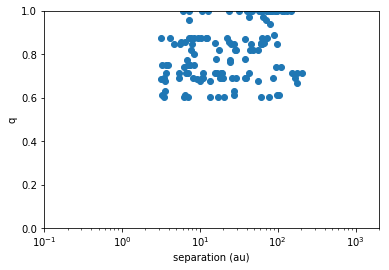

3.2


In [7]:
# finding index of values of sep beyond completeness limit
sorted_sep_Jan = np.sort(sep_Jan)
for pos, val in enumerate(sorted_sep_Jan):
    if val > 3:
        complete_pos_sep = pos # = 7
        print(complete_pos_sep)
        break 
for pos, val in enumerate(sorted_sep_Jan):
    if val > 227:
        complete_pos_sep = pos # = 205
        print(complete_pos_sep)
        break  
        
# places associated q and s values together in one 2 row array
# DI_data[0] = sep, [1] = q
Jan_data = np.stack((sep_Jan, q_Jan))

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a1 = Jan_data[0,:].argsort() 
Jan_data_sorted = Jan_data[:,a1]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
Jan_data_complete1 = np.array([Jan_data_sorted[i][7:205] for i in range(0,2)])

# accounting for q completion
# sorts array of values by ascending q, keeps associated values together
a2 = Jan_data_complete1[1,:].argsort() 
Jan_data_sorted2 = Jan_data_complete1[:,a2]

# finding index of values of q beyond completeness limit
sorted_q_Jan = np.sort(Jan_data_sorted2[1])
for pos, val in enumerate(sorted_q_Jan):
    if val > .6:
        complete_pos_Jan = pos # = 66
        print(complete_pos_Jan)
        break

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
Jan_data_complete = np.array([Jan_data_sorted2[i][66:] for i in range(0,2)])

plt.scatter(Jan_data_complete[0],Jan_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.xscale('log')
plt.xlim(0.1,2000)
plt.ylim(0,1)
plt.show()

print(np.amin(Jan_data_complete[0]))

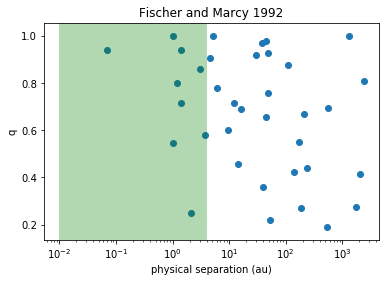

In [8]:
# Fischer and Marcy 1992

import statistics

sep_FM, m1_FM, m2_FM = np.loadtxt('data\FM_data.txt', skiprows = 1, delimiter = ',', unpack = True)

q_FM = np.zeros(214)
q_FM = np.divide(m2_FM, m1_FM)

plt.scatter(sep_FM, q_FM)
plt.ylabel("q")
plt.xlabel("physical separation (au)")
plt.xscale('log')
# plt.axhline(y=.3) # spt < 3.5
# plt.axhline(y=.6) # spt > 3.5
# plt.axvline(x=2.6)
# plt.axvline(x=29.5)
plt.axvspan(0.01, 4, facecolor='g', alpha=.3)

plt.title("Fischer and Marcy 1992")
plt.show()



9
3


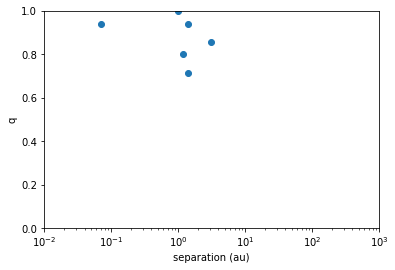

3.1


In [9]:
# finding index of values of sep beyond completeness limit
sorted_sep_FM = np.sort(sep_FM)
for pos, val in enumerate(sorted_sep_FM):
    if val > 4:
        complete_pos_sep = pos # = 9
        print(complete_pos_sep)
        break 
 
        
# places associated q and s values together in one 2 row array
# DI_data[0] = sep, [1] = q
FM_data = np.stack((sep_FM, q_FM))

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a1 = FM_data[0,:].argsort() 
FM_data_sorted = FM_data[:,a1]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
FM_data_complete1 = np.array([FM_data_sorted[i][:9] for i in range(0,2)])

# accounting for q completion
# sorts array of values by ascending q, keeps associated values together
a2 = FM_data_complete1[1,:].argsort() 
FM_data_sorted2 = FM_data_complete1[:,a2]

# finding index of values of q beyond completeness limit
sorted_q_FM = np.sort(FM_data_sorted2[1])
for pos, val in enumerate(sorted_q_FM):
    if val > .6:
        complete_pos_FM = pos # = 3
        print(complete_pos_FM)
        break

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
FM_data_complete = np.array([FM_data_sorted2[i][3:] for i in range(0,2)])

plt.scatter(FM_data_complete[0],FM_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.xscale('log')
plt.xlim(0.01,1000)
plt.ylim(0,1)
plt.show()
print(np.amax(FM_data_complete[0]))


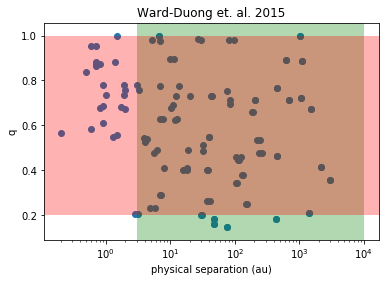

In [10]:
# Ward-Duong et. al. 2015
sep_WD, m1_WD, m2_WD = np.loadtxt('data\WD_data.csv', skiprows = 0, delimiter = ',', unpack = True)

q_WD = np.zeros(214)
q_WD = np.divide(m2_WD, m1_WD)

plt.scatter(sep_WD, q_WD)
plt.ylabel("q")
plt.xlabel("physical separation (au)")
plt.xscale('log')
# plt.axhline(y=.3) # spt < 3.5
# plt.axhline(y=.6) # spt > 3.5
# plt.axvline(x=2.6)
# plt.axvline(x=29.5)
plt.axvspan(3, 10000, facecolor='g', alpha=.3)
plt.axhspan(.2, 1, facecolor='r', alpha=0.3)
plt.title("Ward-Duong et. al. 2015")
plt.show()

25
55


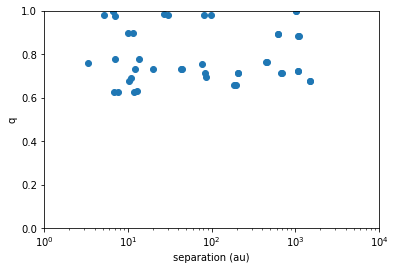

3.3


In [11]:
# finding index of values of sep beyond completeness limit
sorted_sep_WD = np.sort(sep_WD)
for pos, val in enumerate(sorted_sep_WD):
    if val > 3:
        complete_pos_sep = pos # = 25
        print(complete_pos_sep)
        break 
for pos, val in enumerate(sorted_sep_WD):
    if val > 10000:
        complete_pos_sep = pos # = none
        print(complete_pos_sep)
        break  
 
        
# places associated q and s values together in one 2 row array
# DI_data[0] = sep, [1] = q
WD_data = np.stack((sep_WD, q_WD))

# accounting for sep completion
# sorts array of values by ascending sep, keeps associated values together
a1 = WD_data[0,:].argsort() 
WD_data_sorted = WD_data[:,a1]

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
WD_data_complete1 = np.array([WD_data_sorted[i][25:] for i in range(0,2)])

# accounting for q completion
# sorts array of values by ascending q, keeps associated values together
a2 = WD_data_complete1[1,:].argsort() 
WD_data_sorted2 = WD_data_complete1[:,a2]

# finding index of values of q beyond completeness limit
sorted_q_WD = np.sort(WD_data_sorted2[1])
for pos, val in enumerate(sorted_q_WD):
    if val > .6:
        complete_pos_WD = pos # = 55
        print(complete_pos_WD)
        break

# splicing off values beyond completeness limit using index found above, therefore accounting for completeness
WD_data_complete = np.array([WD_data_sorted2[i][55:] for i in range(0,2)])

plt.scatter(WD_data_complete[0],WD_data_complete[1])
plt.ylabel("q")
plt.xlabel("separation (au)")
plt.xscale('log')
plt.xlim(1,10000)
plt.ylim(0,1)
plt.show()
print(np.amin(WD_data_complete[0]))


In [19]:
import math

# observed separations within completion (AU)
a_min_CC = 2.7642
a_max_CC = 26.46
a_min_Del = .0363
a_max_Del = .7976
a_min_Jan = 3.2
a_max_Jan = 215.2
a_min_FM = .07
a_max_FM = 3.1
a_min_WD = 3.3
a_max_WD = 1512.1
a_min_SV = 1
a_max_SV = 10

# # complete separations
# a_min_DI = 2.6
# a_max_DI = 29.5
# a_min_RV = .01
# a_max_RV = 4.6

parent_CC = 490
parent_Del = 115
parent_Jan = 761
parent_FM = 72
parent_WD = 245
parent_SV = 224

companions_Jan = Jan_data_complete[1].size # q > .6
companions_CC = CC_data_complete[1].size # q > .6
companions_Del = Del_data_complete[1].size # q > .6
companions_FM = FM_data_complete[1].size # q > .6
companions_WD = WD_data_complete[1].size # q > .6
companions_SV = 18

f_CC = companions_CC / parent_CC
f_Del = companions_Del / parent_Del
f_Jan = companions_Jan / parent_Jan
f_FM = companions_FM / parent_FM
f_WD = companions_WD / parent_WD
f_SV = companions_SV / parent_SV

err_CC = math.sqrt(companions_CC) / parent_CC
err_Del = math.sqrt(companions_CC) / parent_Del
err_Jan = math.sqrt(companions_CC) / parent_Jan
err_FM = math.sqrt(companions_CC) / parent_FM
err_WD = math.sqrt(companions_CC) / parent_WD
err_SV = math.sqrt(companions_CC) / parent_SV

print("f_CC = ", f_CC,"f_Del = ", f_Del, "f_Jan = ", f_Jan, "f_FM = ", f_FM, "f_WD = ", f_WD, "f_SV = ", f_SV)

f_CC =  0.06938775510204082 f_Del =  0.043478260869565216 f_Jan =  0.17345597897503284 f_FM =  0.08333333333333333 f_WD =  0.17959183673469387 f_SV =  0.08035714285714286
0.026031035244845093


In [21]:
import scipy.integrate as integrate
from math import log10
import warnings
warnings.simplefilter('ignore')

e = 2.71828
pi = 3.141593
# mean_loga = math.log(20,10)
# logsigma = 1.16
nu = 6-3 #data points - fitted parameters

for mean_loga in np.arange(0,2,.01):
    for sigma in np.arange(0,2,.01):
        for A in np.arange(0,2,.01):
            int_CC = integrate.quad(lambda x: (np.exp(-np.power(x - mean_loga, 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_CC),log10(a_max_CC))
            int_Del = integrate.quad(lambda x: (np.exp(-np.power(x - mean_loga, 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_Del),log10(a_max_Del))
            int_Jan = integrate.quad(lambda x: (np.exp(-np.power(x - mean_loga, 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_Jan),log10(a_max_Jan))
            int_FM = integrate.quad(lambda x: (np.exp(-np.power(x - mean_loga, 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_FM),log10(a_max_FM))
            int_WD = integrate.quad(lambda x: (np.exp(-np.power(x - mean_loga, 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_WD),log10(a_max_WD))   
            int_SV = integrate.quad(lambda x: (np.exp(-np.power(x - mean_loga, 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_SV),log10(a_max_SV))   

            model_CC = A * int_CC[0]
            model_Del = A * int_Del[0]
            model_Jan = A * int_Jan[0]
            model_FM = A * int_FM[0]
            model_WD = A * int_WD[0]
            model_SV = A * int_SV[0]
            
            x_CC = np.power(model_cc - f_cc, 2) / np.power(err_CC,2
            
            chi_sq = (1 / nu) * sum(((np.power((model_CC - f_CC), 2))/np.power(err_CC,2), (np.power((model_Del - f_Del), 2))/np.power(err_Del,2), (np.power((model_Jan - f_Jan), 2))/np.power(err_Jan,2), (np.power((model_FM - f_FM), 2))/np.power(err_FM,2), (np.power((model_WD - f_WD), 2))/np.power(err_WD,2), (np.power((model_SV - f_SV), 2))/np.power(err_SV,2)))
            
            if (chi_sq > 1) and (chi_sq < 2):
                print(chi_sq,mean_loga, sigma, A)
            
    
# for A in np.arange(.0001,1,.0001):
#     int_CC = integrate.quad(lambda x: (np.exp(-np.power(x - 1., 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_CC),log10(a_max_CC))
#     int_Del = integrate.quad(lambda x: (np.exp(-np.power(x - 1., 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_Del),log10(a_max_Del))
#     int_Jan = integrate.quad(lambda x: (np.exp(-np.power(x - 1., 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_Jan),log10(a_max_Jan))
#     int_FM = integrate.quad(lambda x: (np.exp(-np.power(x - 1., 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_FM),log10(a_max_FM))
#     int_WD = integrate.quad(lambda x: (np.exp(-np.power(x - 1., 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_WD),log10(a_max_WD))
#     NA = int_Del[0] * A
#     NB = int_CC[0] * A
#     NC = int_Jan[0] * A
#     ND = int_FM[0] * A
#     NE = int_WD[0] * A
#     testA = abs(NA-f_Del)
#     testB = abs(NB-f_CC)
#     testC = abs(NC-f_Jan)
#     testD = abs(ND-f_FM)
#     testE = abs(NE-f_WD)
#     if testA < .025 and testB < .025 and testC < .025 and testD <.025 and testE < .025:
#         print(A)
#         break

# for sigma in np.arange(.001,2,.001):
# # #     N_DI_u = (2/pi)**(1/2) * (i)**(1/2) * e**((log10(a_max_DI)-1)/(2*i**2))
# # #     N_DI_l = (2/pi)**(1/2) * (i)**(1/2) * e**((log10(a_min_DI)-1)/(2*i**2))
# # #     N_DI = N_DI_u - N_DI_l
# # #     N_RV_u = (2/pi)**(1/2) * (i)**(1/2) * e**((log10(a_max_RV)-1)/(2*i**2))
# # #     N_RV_l = (2/pi)**(1/2) * (i)**(1/2) * e**((log10(a_min_RV)-1)/(2*i**2))
# # #     N_RV = N_RV_u - N_RV_l
#     int_CC = integrate.quad(lambda x: (np.exp(-np.power(x - 1., 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_CC),log10(a_max_CC))
#     int_Del = integrate.quad(lambda x: (np.exp(-np.power(x - 1., 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_Del),log10(a_max_Del)) 
#     N_CC = int_CC[0]
#     N_Del = int_Del[0]
#     for A in np.arange(.001,2,.001):
#         NA = N_Del * A
#         NB = N_CC * A
#         testA = abs(NA-f_Del)
#         testB = abs(NB-f_CC)
#         if testA < .0001 and testB < .0001:
#             print(sigma,A, NA, NB, testA, testB)
#             break

# def gaussian(x, sig):
#     return np.exp(-np.power(x - 1, 2.) / (2 * np.power(sigma, 2.))) / (math.sqrt(2*pi)* sigma)

# for i in np.arange(.03,2,.01):
#     sigma = i
# #     int_DI = integrate.quad(lambda x: (e**-(((x-mean_loga)**2)/(2*sigma**2))) / ((2*pi*sigma**2)**(1/2)), log10(a_min_DI),log10(a_max_DI))
# #     int_RV = integrate.quad(lambda x: (e**-(((x-mean_loga)**2)/(2*sigma**2))) / ((2*pi*sigma**2)**(1/2)), log10(a_min_RV),log10(a_max_RV))
#     int_DI = integrate.quad(lambda x: (np.exp(-np.power(x - 1., 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_DI),log10(a_max_DI))
#     int_RV = integrate.quad(lambda x: (np.exp(-np.power(x - 1., 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), log10(a_min_RV),log10(a_max_RV)) 
#     N_DI = int_DI[0]
#     N_RV = int_RV[0]
#     A12 = f_RV / N_RV
#     A34 = f_DI / N_RV
#     print(A12, A34)
# #     if abs(A12 - A34) < .1:
# #         print(A12,A34,sigma, abs(A12 - A34))

KeyboardInterrupt: 

In [14]:

x = []
x_range = []
gaus = []
# mean_loga = math.log(20,10)
# A = .249
print(A)

for i in np.arange(.028,489.09,.01):
    x = log10(i)
    gaus.append(A * np.exp(-np.power(x - mean_loga, 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma))
    x_range.append(i)

fig, ax1 = plt.subplots()
ax1.plot(x_range, gaus, 'b-')
ax1.set_xlabel('log(a)')
ax1.set_ylabel('dN (Log Gaussian Distribution)', color='b')
ax1.tick_params('y', colors='b')
# ax1.axvline(a_min_DI)
# ax1.axvline(a_max_DI)
# ax1.axvline(a_min_RV)
# ax1.axvline(a_max_RV)
# ax1.axvspan(a_min_CC, a_max_CC, facecolor='grey', alpha=.3)
# ax1.axvspan(a_min_Del, a_max_Del, facecolor='grey', alpha=.3)
# ax1.axvspan(a_min_Jan, a_max_Jan, facecolor='grey', alpha=.3)
# ax1.axvspan(a_min_FM, a_max_FM, facecolor='grey', alpha=.3)
ax1.set_ylim(0)


ax2 = ax1.twinx()
# ax2.scatter(9.5,.069, c = 'red') # f_DI_data
# ax2.scatter(.128,.043, c = 'red') # f_RV_data
# ax2.errorbar(9.5, .069, xerr=5,color = 'red')
# ax2.errorbar(.128, .043, xerr=.03,color = 'red')
ax2.set_ylabel('f = int(dN) dlog(a)', color='r')
CC_domain = []
CC_range = np.arange(a_min_CC,a_max_CC,.01)
for i in range(len(CC_range)):
    CC_domain.append(f_CC)

Del_domain = []
Del_range = np.arange(a_min_Del,a_max_Del,.01)
for i in range(len(Del_range)):
    Del_domain.append(f_Del)
    
Jan_domain = []
Jan_range = np.arange(a_min_Jan,a_max_Jan,.01)
for i in range(len(Jan_range)):
    Jan_domain.append(f_Jan)

FM_domain = []
FM_range = np.arange(a_min_FM,a_max_FM,.01)
for k in range(len(FM_range)):
    FM_domain.append(f_FM)

WD_domain = []
WD_range = np.arange(a_min_WD,a_max_WD,.01)
for k in range(len(WD_range)):
    WD_domain.append(f_WD)
    
SV_domain = []
SV_range = np.arange(a_min_SV,a_max_SV,.01)
for k in range(len(SV_range)):
    SV_domain.append(f_SV)

ax2.annotate('CC', xy=(1.5, .0695))
ax2.annotate('Del', xy=(.02, .043))
ax2.annotate('Jan', xy=(1.5, .173))
ax2.annotate('FM', xy=(.05, .0833))
ax2.annotate('WD', xy=(1.5, .18))
    
ax2.plot(CC_range,CC_domain, color="red")
ax2.plot(Del_range,Del_domain, color="red")
ax2.plot(Jan_range,Jan_domain, color="red")
ax2.plot(FM_range,FM_domain, color="red")
ax2.plot(SV_range,SV_domain, color="red")



ax2.tick_params('y', colors='r')
ax2.set_ylim(0,.2)

fig.tight_layout()
plt.xscale('log')
plt.title("Companion Frequency vs. Log of Semi-Major Axis, q > .6")
plt.savefig('result.jpg')
plt.show()

NameError: name 'A' is not defined

In [ ]:
print(A,sigma)

N = integrate.quad(lambda x: (np.exp(-np.power(x - 1., 2.) / (2. * np.power(sigma, 2.))) / (math.sqrt(2.*pi)* sigma)), 0,np.inf)
N = N[0] * A

q1 = integrate.quad(lambda x: x**-.25, .6,1)
q2 = integrate.quad(lambda x: x**-.25, 0,1)
q1 = q1[0]
q2 = q2[0]

q = q2 / q1

N = N * q

print(N)